In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import zipfile

In [2]:

zip_file_path = '/Users/ALONA/Desktop/Go_IT/HW/Data Science/Data_Science/Lessons/Customer_Purchase_Behavior/archive.zip'

with zipfile.ZipFile(zip_file_path, 'r') as z:
    # List of files in the archive
    print("Contents of the ZIP archive:") 
    for file_info in z.infolist():
        print(file_info.filename)

Contents of the ZIP archive:
customer_purchase_data.csv


In [3]:

csv_file_name = "customer_purchase_data.csv"

with zipfile.ZipFile(zip_file_path, "r") as z: 
    with z.open(csv_file_name) as f:
        df = pd.read_csv(f)


print(df.info())

df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 1500 non-null   int64  
 1   Gender              1500 non-null   int64  
 2   AnnualIncome        1500 non-null   float64
 3   NumberOfPurchases   1500 non-null   int64  
 4   ProductCategory     1500 non-null   int64  
 5   TimeSpentOnWebsite  1500 non-null   float64
 6   LoyaltyProgram      1500 non-null   int64  
 7   DiscountsAvailed    1500 non-null   int64  
 8   PurchaseStatus      1500 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 105.6 KB
None


,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
0,40,1,66120.267939,8,0,30.568601,0,5,1
1,20,1,23579.773583,4,2,38.240097,0,5,0
2,27,1,127821.306432,11,2,31.633212,1,0,1
3,24,1,137798.623120,19,3,46.167059,0,4,1
4,31,1,99300.964220,19,1,19.823592,0,0,1


**Working with duplicates** 

In [4]:
# Check for duplicates
duplicates_exist = df.duplicated().any()
print(f"Are there duplicates in the DataFrame: {duplicates_exist}")

# number of duplicates
num_duplicates = df.duplicated().sum()
print(f"Number of duplicates: {num_duplicates}")

Are there duplicates in the DataFrame: True
Number of duplicates: 112


In [5]:
duplicates = df[df.duplicated(keep=False)]

# Sort duplicates by all columns
sorted_duplicates = duplicates.sort_values(by=df.columns.tolist())

sorted_duplicates

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
1139,18,1,111861.883084,5,2,31.027565,1,3,0
1150,18,1,111861.883084,5,2,31.027565,1,3,0
126,19,1,24590.476142,1,3,14.971058,0,5,0
774,19,1,24590.476142,1,3,14.971058,0,5,0
314,20,0,44443.215500,9,2,11.463730,1,0,0
...,...,...,...,...,...,...,...,...,...
961,70,0,119425.274117,4,3,45.355881,0,5,0
441,70,1,44197.666708,4,4,16.593685,1,4,0
749,70,1,44197.666708,4,4,16.593685,1,4,0
541,70,1,67880.238966,2,0,47.122010,0,2,0


In this dataframe, there are 112 duplicates. To provide clearer information, these duplicates are removed from the working dataframe.

In [6]:
df = df.drop_duplicates()

In [7]:
df.columns

Index(['Age', 'Gender', 'AnnualIncome', 'NumberOfPurchases', 'ProductCategory',
       'TimeSpentOnWebsite', 'LoyaltyProgram', 'DiscountsAvailed',
       'PurchaseStatus'],
      dtype='object')

# Training on the output of normalized data

In [8]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression


In [9]:
def plot_confusion_matrices(y_true_list, y_pred_list, model_names, overall_title="Confusion Matrices"):
    # Checking the length of lists
    assert len(y_true_list) == len(y_pred_list) == len(model_names), "Lists must have the same length"

    n = len(y_true_list)  # The number of confusion matrices
    fig, axes = plt.subplots(1, n, figsize=(4 * n, 4))  # Creating subplots in one line

    for i in range(n):
        # Calculation of the confusion matrix
        conf_matrix = confusion_matrix(y_true_list[i], y_pred_list[i])

        # Visualization of the confusion matrix
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
                    xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'],
                    ax=axes[i])
        axes[i].set_title(model_names[i])
        axes[i].set_xlabel('Predicted')
        axes[i].set_ylabel('True')

    # Adding a general header
    fig.suptitle(overall_title, fontsize=16)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjustment of subgraphs and header
    plt.show()


In [10]:
def make_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    accuracy = accuracy_score(y_test, y_pred)
    return y_pred, report, accuracy


def create_table_results(name: str, report, accuracy):
    # Extract the average values ​​for all classes
    precision = report['macro avg']['precision']
    recall = report['macro avg']['recall']
    f1_score = report['macro avg']['f1-score']

    # results to the DataFrame
    results = pd.DataFrame([{
        "Model": name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1_score
        }])
    return results


## Baseline models

In [11]:
results_base = pd.DataFrame(columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score"])

y_true_list_base = [] 
y_pred_list_base = [] 
model_names_base = []

In [12]:
all_features = ['Age', 'Gender', 'AnnualIncome', 'NumberOfPurchases', 'ProductCategory',
       'TimeSpentOnWebsite', 'LoyaltyProgram', 'DiscountsAvailed']

scaler = StandardScaler()

df_copy = df.copy()
df_copy[all_features] = scaler.fit_transform(df_copy[all_features])

X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(
    df_copy[all_features], 
    df_copy["PurchaseStatus"],
    test_size=0.3,
    stratify=df_copy["PurchaseStatus"]
    )

In [13]:
name_rf_b = "Random Forest Base Model"
model_rf_b = RandomForestClassifier()
y_pred_rf_b, report_rf_b, accuracy_rf_b = make_model(model_rf_b, X_train_b, X_test_b, y_train_b, y_test_b)

y_true_list_base.append(y_test_b)
y_pred_list_base.append(y_pred_rf_b)
model_names_base.append(name_rf_b)

results_rf_b = create_table_results(name_rf_b, report_rf_b, accuracy_rf_b)
results_base = pd.concat([results_base, results_rf_b], ignore_index=True)


name_gb_b = "Gradient Boosting Base Model"
model_gb_b = GradientBoostingClassifier()
y_pred_gb_b, report_gb_b, accuracy_gb_b = make_model(model_gb_b, X_train_b, X_test_b, y_train_b, y_test_b)

y_true_list_base.append(y_test_b)
y_pred_list_base.append(y_pred_gb_b)
model_names_base.append(name_gb_b)

results_gb_b = create_table_results(name_gb_b, report_gb_b, accuracy_gb_b)
results_base = pd.concat([results_base, results_gb_b], ignore_index=True)

name_svm_b = "SVM Base Model"
model_svm_b = SVC()
y_pred_svm_b, report_svm_b, accuracy_svm_b = make_model(model_svm_b, X_train_b, X_test_b, y_train_b, y_test_b)

y_true_list_base.append(y_test_b)
y_pred_list_base.append(y_pred_svm_b)
model_names_base.append(name_svm_b)

results_svm_b = create_table_results(name_svm_b, report_svm_b, accuracy_svm_b)
results_base = pd.concat([results_base, results_svm_b], ignore_index=True)

name_lr_b = "Logistic Regression Base Model"
model_lr_b = LogisticRegression()
y_pred_lr_b, report_lr_b, accuracy_lr_b = make_model(model_lr_b, X_train_b, X_test_b, y_train_b, y_test_b)

y_true_list_base.append(y_test_b)
y_pred_list_base.append(y_pred_lr_b)
model_names_base.append(name_lr_b)

results_lr_b = create_table_results(name_lr_b, report_lr_b, accuracy_lr_b)
results_base = pd.concat([results_base, results_lr_b], ignore_index=True)



/var/folders/zb/nl25s0l50sl0r6n18b3fm3w00000gp/T/ipykernel_29958/751445811.py:10: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_base = pd.concat([results_base, results_rf_b], ignore_index=True)


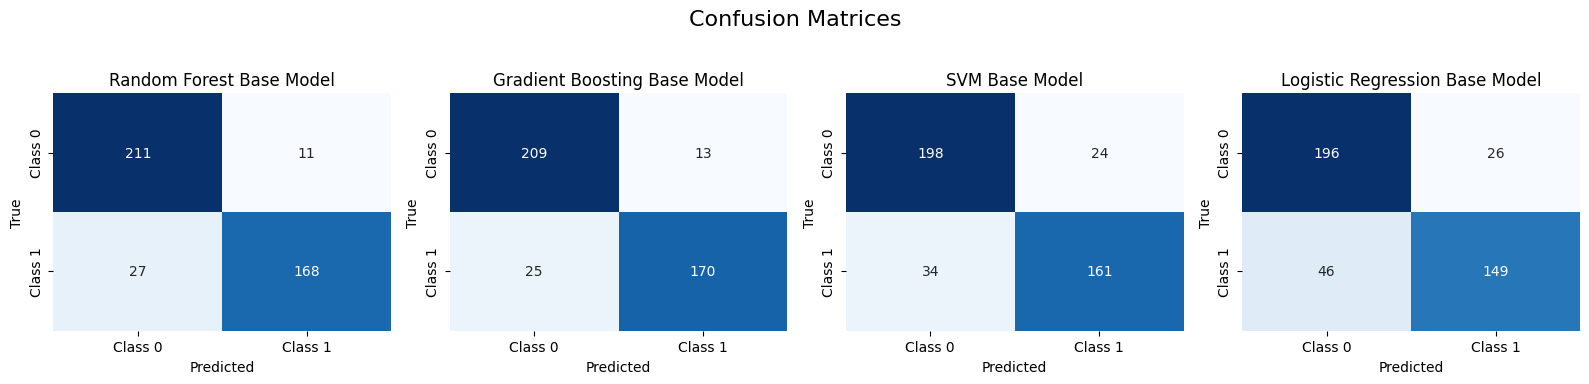

|    | Model                          |   Accuracy |   Precision |   Recall |   F1-Score |
|---:|:-------------------------------|-----------:|------------:|---------:|-----------:|
|  0 | Random Forest Base Model       |   0.908873 |    0.912551 | 0.905994 |   0.907894 |
|  1 | Gradient Boosting Base Model   |   0.908873 |    0.911062 | 0.906618 |   0.908069 |
|  2 | SVM Base Model                 |   0.860911 |    0.861859 | 0.858766 |   0.859808 |
|  3 | Logistic Regression Base Model |   0.827338 |    0.830673 | 0.823493 |   0.825116 |


In [55]:
plot_confusion_matrices(y_true_list_base, y_pred_list_base, model_names_base)
print(results_base.to_markdown())

# Correlation

### Calculating Correlation

In [15]:

correlation_matrix = df.corr()

# correlation with PurchaseStatus
purchase_status_corr = correlation_matrix['PurchaseStatus'].sort_values(ascending=False)
purchase_status_corr = purchase_status_corr.drop('PurchaseStatus')  # delate correlation with yourself


print("Correlation of features with PurchaseStatus:")
print(purchase_status_corr)

Correlation of features with PurchaseStatus:
LoyaltyProgram        0.318059
DiscountsAvailed      0.296606
TimeSpentOnWebsite    0.282127
NumberOfPurchases     0.219116
AnnualIncome          0.191218
ProductCategory       0.014349
Gender                0.008856
Age                  -0.253598
Name: PurchaseStatus, dtype: float64


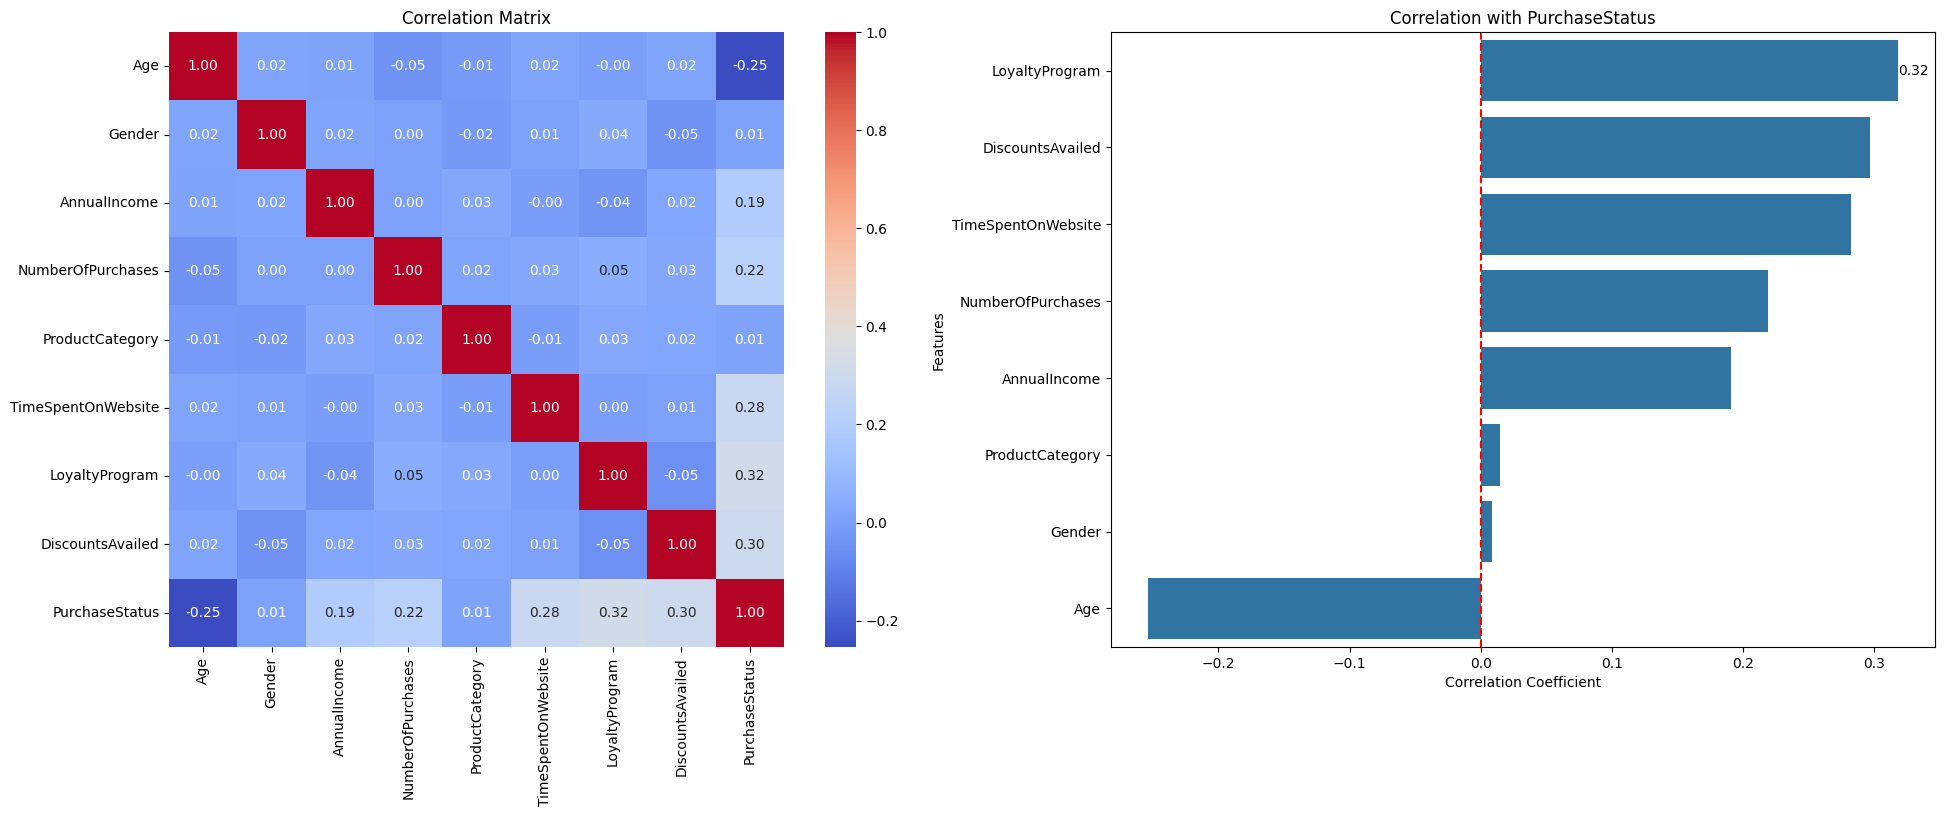

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,8))

sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, ax=ax1)
ax1.set_title("Correlation Matrix")

sns.barplot(x=purchase_status_corr.values, y=purchase_status_corr.index, orient="h", ax=ax2)
ax2.set_title("Correlation with PurchaseStatus")
ax2.set_xlabel("Correlation Coefficient")
ax2.set_ylabel("Features")


ax2.axvline(x=0, color="r", linestyle="--")

for i, v in enumerate(purchase_status_corr.values):
    ax2.text(v, i, f"{v:.2f}", va="center")

    plt.tight_layout()
    plt.show()

### Analysis of feature correlations with the target variable PurchaseStatus:

- **LoyaltyProgram (0.310838):**
    - Strongest positive correlation.
    - Indicates that participation in the loyalty program has the greatest positive impact on the likelihood of purchase.

- **DiscountsAvailed (0.303297):**
    - Second strongest positive correlation.
    - Shows that using discounts also significantly increases the likelihood of purchase.

- **TimeSpentOnWebsite (0.277112):**
    - Moderate positive correlation.
    - The more time a customer spends on the website, the higher the probability of purchase.

- **NumberOfPurchases (0.222691):**
    - Medium strength positive correlation.
    - Indicates that customers who have made more purchases in the past are more likely to make a purchase again.

- **AnnualIncome (0.188214):**
    - Weak positive correlation.
    - Shows that annual income has some positive influence on the likelihood of purchase, but not very strong.

- **ProductCategory (0.007346) and Gender (0.002627):**
    - Very weak correlation, close to zero.
    - These features have almost no impact on the likelihood of purchase.

- **Age (-0.255747):**
    - Moderate negative correlation.
    - Indicates that younger customers are more likely to make purchases than older ones.

**Conclusions and recommendations:**

- Loyalty program and discounts are the most effective factors in increasing the likelihood of purchase. It is recommended to strengthen these aspects of the marketing strategy.
- Time spent on the website is also important. It's worth working on improving the user experience and increasing the time users spend on the site.
- The number of previous purchases affects future purchases. Strategies should be developed to encourage repeat purchases.
- Age has an inverse correlation. Consider targeting marketing campaigns to a younger audience or develop special offers to attract the older age group.
- Gender and product category have little effect on the likelihood of purchase. This may mean that your products are equally attractive to different genders and categories.
- Annual income has a weak influence. It might be worth considering other factors when segmenting customers.


## Models taking into account correlation

In [17]:
results_corr = pd.DataFrame(columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score"])

y_true_list_corr = [] 
y_pred_list_corr = [] 
model_names_corr = []

In [18]:
features = ['Age', 'NumberOfPurchases', 'TimeSpentOnWebsite',
            'LoyaltyProgram', 'DiscountsAvailed', 'AnnualIncome']

features_for_drop = ['Gender', 'ProductCategory']


ndata = df.copy()
ndata = ndata.drop(columns=features_for_drop)

ndata[features] = scaler.fit_transform(ndata[features])

X_train, X_test, y_train, y_test = train_test_split(
    ndata[features],
    ndata['PurchaseStatus'],
    test_size=0.3,
    stratify=ndata['PurchaseStatus']
)

In [19]:
name_rf_corr = "Random Forest with Correlation"
model_rf_corr = RandomForestClassifier()
y_pred_rf_corr, report_rf_corr, accuracy_rf_corr = make_model(model_rf_corr, X_train, X_test, y_train, y_test)

y_true_list_corr.append(y_test)
y_pred_list_corr.append(y_pred_rf_corr)
model_names_corr.append(name_rf_corr)

results_rf_corr = create_table_results(name_rf_corr, report_rf_corr, accuracy_rf_corr)
results_corr = pd.concat([results_corr, results_rf_corr], ignore_index=True)

name_gb_corr = "Gradient Boosting with Correlation"
model_gb_corr = GradientBoostingClassifier()
y_pred_gb_corr, report_gb_corr, accuracy_gb_corr = make_model(model_gb_corr, X_train, X_test, y_train, y_test)

y_true_list_corr.append(y_test)
y_pred_list_corr.append(y_pred_gb_corr)
model_names_corr.append(name_gb_corr)

results_gb_corr = create_table_results(name_gb_corr, report_gb_corr, accuracy_gb_corr)
results_corr = pd.concat([results_corr, results_gb_corr], ignore_index=True)

name_svm_corr = "SVM with Correlation"
model_svm_corr = SVC()
y_pred_svm_corr, report_svm_corr, accuracy_svm_corr = make_model(model_svm_corr, X_train, X_test, y_train, y_test)

y_true_list_corr.append(y_test)
y_pred_list_corr.append(y_pred_svm_corr)
model_names_corr.append(name_svm_corr)

results_svm_corr = create_table_results(name_svm_corr, report_svm_corr, accuracy_svm_corr)
results_corr = pd.concat([results_corr, results_svm_corr], ignore_index=True)

name_lr_corr = "Logistic Regression with Correlation"
model_lr_corr = LogisticRegression()
y_pred_lr_corr, report_lr_corr, accuracy_lr_corr = make_model(model_lr_corr, X_train, X_test, y_train, y_test)

y_true_list_corr.append(y_test)
y_pred_list_corr.append(y_pred_lr_corr)
model_names_corr.append(name_lr_corr)

results_lr_corr = create_table_results(name_lr_corr, report_lr_corr, accuracy_lr_corr)
results_corr = pd.concat([results_corr, results_lr_corr], ignore_index=True)

print(f"{name_lr_corr}:\n {report_lr_corr}\n Accuracy: {accuracy_lr_corr}")

Logistic Regression with Correlation:
 {'0': {'precision': 0.8235294117647058, 'recall': 0.8198198198198198, 'f1-score': 0.8216704288939052, 'support': 222.0}, '1': {'precision': 0.7959183673469388, 'recall': 0.8, 'f1-score': 0.7979539641943734, 'support': 195.0}, 'accuracy': 0.8105515587529976, 'macro avg': {'precision': 0.8097238895558223, 'recall': 0.8099099099099099, 'f1-score': 0.8098121965441393, 'support': 417.0}, 'weighted avg': {'precision': 0.8106177722887716, 'recall': 0.8105515587529976, 'f1-score': 0.8105799957610306, 'support': 417.0}}
 Accuracy: 0.8105515587529976


/var/folders/zb/nl25s0l50sl0r6n18b3fm3w00000gp/T/ipykernel_29958/148437508.py:10: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_corr = pd.concat([results_corr, results_rf_corr], ignore_index=True)


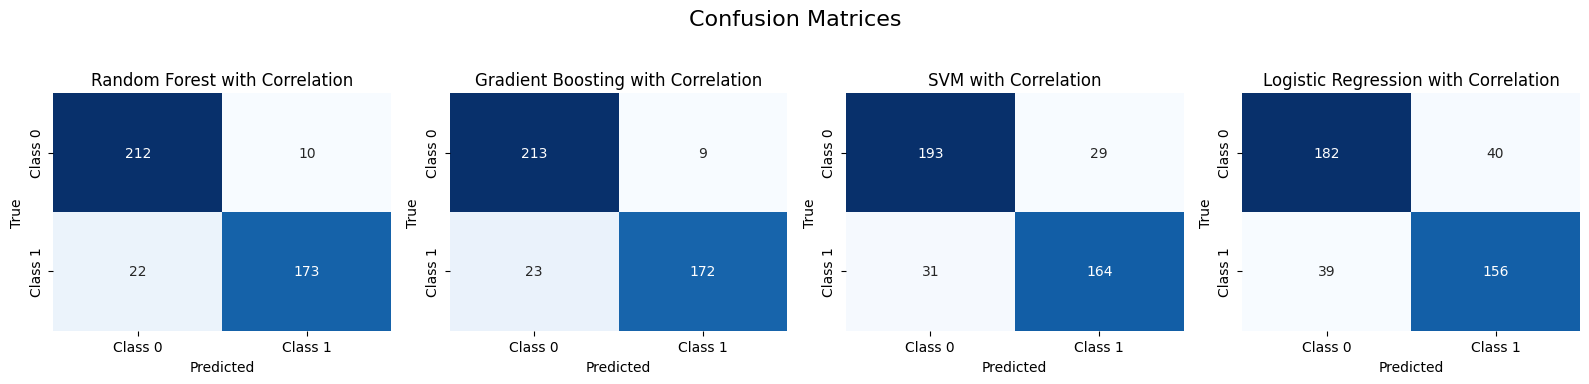

,Model,Accuracy,Precision,Recall,F1-Score
0,Random Forest with Correlation,0.923261,0.925669,0.921067,0.922584
1,Gradient Boosting with Correlation,0.923261,0.926409,0.920755,0.922512
2,SVM with Correlation,0.856115,0.855674,0.855198,0.855416
3,Logistic Regression with Correlation,0.810552,0.809724,0.809910,0.809812


In [20]:
plot_confusion_matrices(y_true_list_corr, y_pred_list_corr, model_names_corr)
results_corr

# Results



### Confusion matrices



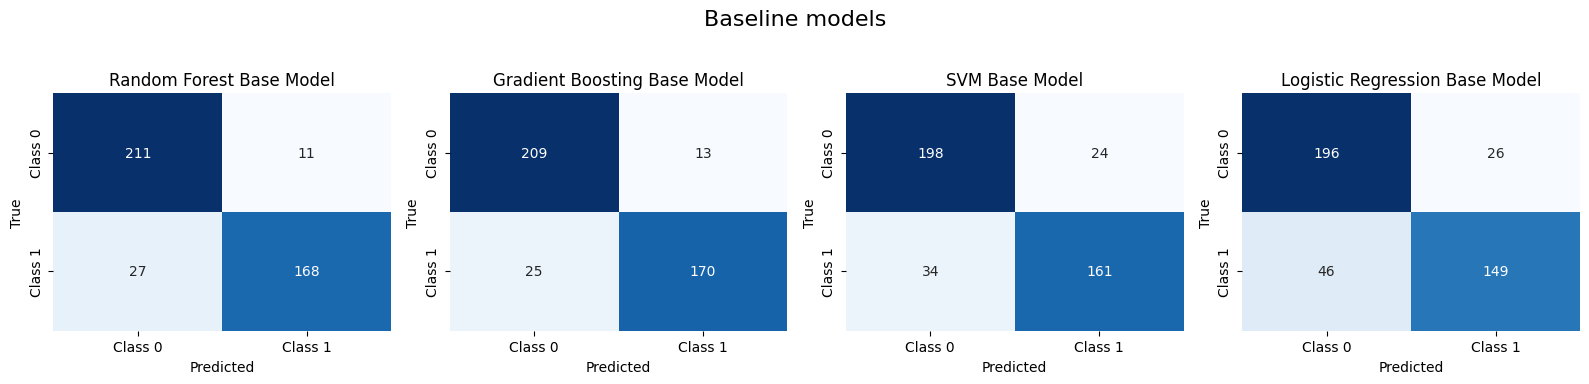

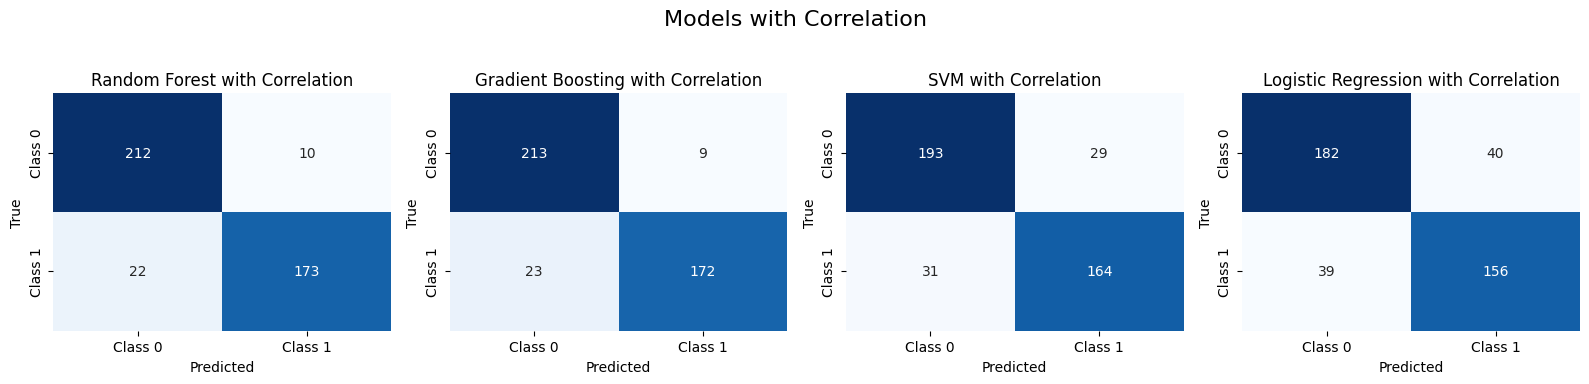

In [21]:
plot_confusion_matrices(y_true_list_base, y_pred_list_base, model_names_base, overall_title="Baseline models")
plot_confusion_matrices(y_true_list_corr, y_pred_list_corr, model_names_corr, overall_title="Models with Correlation")

### Classification Performance Summary

In [60]:
print(results_base.to_markdown())
print("*"*100)
print(results_corr.to_markdown())

|    | Model                          |   Accuracy |   Precision |   Recall |   F1-Score |
|---:|:-------------------------------|-----------:|------------:|---------:|-----------:|
|  0 | Random Forest Base Model       |   0.908873 |    0.912551 | 0.905994 |   0.907894 |
|  1 | Gradient Boosting Base Model   |   0.908873 |    0.911062 | 0.906618 |   0.908069 |
|  2 | SVM Base Model                 |   0.860911 |    0.861859 | 0.858766 |   0.859808 |
|  3 | Logistic Regression Base Model |   0.827338 |    0.830673 | 0.823493 |   0.825116 |
****************************************************************************************************
|    | Model                                |   Accuracy |   Precision |   Recall |   F1-Score |
|---:|:-------------------------------------|-----------:|------------:|---------:|-----------:|
|  0 | Random Forest with Correlation       |   0.923261 |    0.925669 | 0.921067 |   0.922584 |
|  1 | Gradient Boosting with Correlation   |   0.923261 |    

In [24]:
conf_matrix_rf_corr = confusion_matrix(y_test, y_pred_rf_corr)
print(conf_matrix_rf_corr)
conf_matrix_gb_corr = confusion_matrix(y_test, y_pred_gb_corr)
print(conf_matrix_gb_corr)

[[212  10]
 [ 22 173]]
[[213   9]
 [ 23 172]]


## Проміжний висновок

На основі результатів досліджень, представлених у таблицях, можна зробити наступні висновки щодо вибору моделей для подальшої роботи. Серед усіх розглянутих моделей, **Random Forest with Correlation** та **Gradient Boosting with Correlation** показали найвищі показники точності, precision, recall та F1-score, досягнувши 92.33%. Це свідчить про те, що врахування кореляції ознак значно покращує продуктивність цих моделей.

У той же час, **SVM** та **Logistic Regression** продемонстрували погані результати, з точністю 86.09% і 82.73% відповідно. Навіть врахування кореляції не змогло суттєво поліпшити їх продуктивність, що вказує на їхню меншу ефективність у даному контексті.

Зважаючи на отримані результати, для подальшої роботи обрано дві моделі: **Random Forest with Correlation** та **Gradient Boosting with Correlation**. Ці моделі демонструють високу здатність до узагальнення даних і є найбільш перспективними для вирішення задач, що потребують високої точності та надійності.


# Improving the results of the best model

## Hyperparameter Optimization
Using hyperparameter optimization methods such as Grid Search or Random Search can help find the best hyperparameter values ​​for a model.


Використання методів оптимізації гіперпараметрів, таких як Grid Search або Random Search, може допомогти знайти найкращі значення гіперпараметрів для моделі.

### Grid Search

In [34]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import randint

rf = RandomForestClassifier()
y_true_list_rf_best = [] 
y_pred_list_rf_best = [] 
model_names_rf_best = []

results_rf_best = pd.DataFrame(columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score"])
# add Random Forest with Correlation model
results_rf_best = pd.concat([results_rf_best, results_rf_corr], ignore_index=True)

y_true_list_rf_best.append(y_test)
y_pred_list_rf_best.append(y_pred_rf_corr)
model_names_rf_best.append(name_rf_corr)


gb = GradientBoostingClassifier()
y_true_list_gb_best = [] 
y_pred_list_gb_best = [] 
model_names_gb_best = []

results_gb_best = pd.DataFrame(columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score"])
results_gb_best = pd.concat([results_gb_best, results_gb_corr], ignore_index=True)

y_true_list_gb_best.append(y_test)
y_pred_list_gb_best.append(y_pred_gb_corr)
model_names_gb_best.append(name_gb_corr)

/var/folders/zb/nl25s0l50sl0r6n18b3fm3w00000gp/T/ipykernel_29958/3169209877.py:11: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_rf_best = pd.concat([results_rf_best, results_rf_corr], ignore_index=True)
/var/folders/zb/nl25s0l50sl0r6n18b3fm3w00000gp/T/ipykernel_29958/3169209877.py:24: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_gb_best = pd.concat([results_gb_best, results_gb_corr], ignore_index=True)


In [35]:
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
# Define the parameter grid for GradientBoostingClassifier
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 10],  # Gradient Boosting typically uses shallower trees
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'learning_rate': [0.01, 0.1, 0.2]  # Include learning rate as it's crucial for boosting
}

grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train, y_train)


name_rf_gs = "Random Forest using Grid Search"
model_rf_gs = grid_search_rf.best_estimator_
y_pred_rf_gs, report_rf_gs, accuracy_rf_gs = make_model(model_rf_gs, X_train, X_test, y_train, y_test)

y_true_list_rf_best.append(y_test)
y_pred_list_rf_best.append(y_pred_rf_gs)
model_names_rf_best.append(name_rf_gs)


results_rf_gs = create_table_results(name_rf_gs, report_rf_gs, accuracy_rf_gs)
results_rf_best = pd.concat([results_rf_best, results_rf_gs], ignore_index=True)



grid_search_gb = GridSearchCV(estimator=gb, param_grid=param_grid_gb, cv=5, n_jobs=-1, verbose=2)
grid_search_gb.fit(X_train, y_train)

name_gb_gs = "Gradient Boosting using Grid Search"
model_gb_gs = grid_search_gb.best_estimator_
y_pred_gb_gs, report_gb_gs, accuracy_gb_gs = make_model(model_gb_gs, X_train, X_test, y_train, y_test)

y_true_list_gb_best.append(y_test)
y_pred_list_gb_best.append(y_pred_gb_gs)
model_names_gb_best.append(name_gb_gs)

results_gb_gs = create_table_results(name_gb_gs, report_gb_gs, accuracy_gb_gs)
results_gb_best = pd.concat([results_gb_best, results_gb_gs], ignore_index=True)



Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; tot

In [36]:
print("Best parameters found: ", grid_search_rf.best_params_)
print(f"{name_rf_gs}:\n {report_rf_gs}\n Accuracy: {accuracy_rf_gs}")

print("Best parameters found: ", grid_search_rf.best_params_)
print(f"{name_gb_gs}:\n {report_gb_gs}\n Accuracy: {accuracy_gb_gs}")

Best parameters found:  {'bootstrap': False, 'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Random Forest using Grid Search:
 {'0': {'precision': 0.9217391304347826, 'recall': 0.954954954954955, 'f1-score': 0.9380530973451328, 'support': 222.0}, '1': {'precision': 0.946524064171123, 'recall': 0.9076923076923077, 'f1-score': 0.9267015706806283, 'support': 195.0}, 'accuracy': 0.9328537170263789, 'macro avg': {'precision': 0.9341315973029528, 'recall': 0.9313236313236313, 'f1-score': 0.9323773340128805, 'support': 417.0}, 'weighted avg': {'precision': 0.9333292073618483, 'recall': 0.9328537170263789, 'f1-score': 0.9327448294804365, 'support': 417.0}}
 Accuracy: 0.9328537170263789
Best parameters found:  {'bootstrap': False, 'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Gradient Boosting using Grid Search:
 {'0': {'precision': 0.908695652173913, 'recall': 0.9414414414414415, 'f1-score': 0.9247787610619469, 'suppor

### Random Search

In [37]:
from scipy.stats import randint, uniform

param_dist_rf = {
    'n_estimators': randint(100, 300),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 4),
    'bootstrap': [True, False]
}

param_dist_gb = {
    'n_estimators': randint(100, 300),  # Randomly choose between 100 and 300
    'max_depth': randint(3, 10),  # Randomly choose between 3 and 10
    'min_samples_split': randint(2, 10),  # Randomly choose between 2 and 10
    'min_samples_leaf': randint(1, 4),  # Randomly choose between 1 and 4
    'learning_rate': uniform(0.01, 0.19)  # Randomly choose between 0.01 and 0.2
}

random_search_rf = RandomizedSearchCV(estimator=rf, param_distributions=param_dist_rf, n_iter=100, cv=5, n_jobs=-1, verbose=2, random_state=42)
random_search_rf.fit(X_train, y_train)

name_rf_rs = "Random Forest using Random Search"
model_rf_rs = random_search_rf.best_estimator_
y_pred_rf_rs, report_rf_rs, accuracy_rf_rs = make_model(model_rf_rs, X_train, X_test, y_train, y_test)

y_true_list_rf_best.append(y_test)
y_pred_list_rf_best.append(y_pred_rf_rs)
model_names_rf_best.append(name_rf_rs)

results_rf_rs = create_table_results(name_rf_rs, report_rf_rs, accuracy_rf_rs)
results_rf_best = pd.concat([results_rf_best, results_rf_rs], ignore_index=True)


random_search_gb = RandomizedSearchCV(estimator=gb, param_distributions=param_dist_gb, n_iter=100, cv=5, n_jobs=-1, verbose=2, random_state=42)
random_search_gb.fit(X_train, y_train)

name_gb_rs = "Gradient Boosting using Random Search"
model_gb_rs = random_search_gb.best_estimator_
y_pred_gb_rs, report_gb_rs, accuracy_gb_rs = make_model(model_gb_rs, X_train, X_test, y_train, y_test)

y_true_list_gb_best.append(y_test)
y_pred_list_gb_best.append(y_pred_gb_rs)
model_names_gb_best.append(name_gb_rs)

results_gb_rs = create_table_results(name_gb_rs, report_gb_rs, accuracy_gb_rs)
results_gb_best = pd.concat([results_gb_best, results_gb_rs], ignore_index=True)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=1, min_samples_split=8, n_estimators=206; total time=   0.4s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=1, min_samples_split=8, n_estimators=206; total time=   0.4s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=1, min_samples_split=8, n_estimators=206; total time=   0.4s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=1, min_samples_split=8, n_estimators=206; total time=   0.5s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=8, n_estimators=221; total time=   0.4s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=8, n_estimators=221; total time=   0.4s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=1, min_samples_split=8, n_estimators=206; total time=   0.5s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=8, n_estimators=221; total time=

In [38]:
print("Best parameters found: ", random_search_rf.best_params_)
print(f"{name_rf_rs}:\n {report_rf_rs}\n Accuracy: {accuracy_rf_rs}")

print("Best parameters found: ", random_search_gb.best_params_)
print(f"{name_gb_rs}:\n {report_gb_rs}\n Accuracy: {accuracy_gb_rs}")

Best parameters found:  {'bootstrap': False, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 9, 'n_estimators': 290}
Random Forest using Random Search:
 {'0': {'precision': 0.9141630901287554, 'recall': 0.9594594594594594, 'f1-score': 0.9362637362637363, 'support': 222.0}, '1': {'precision': 0.9510869565217391, 'recall': 0.8974358974358975, 'f1-score': 0.9234828496042217, 'support': 195.0}, 'accuracy': 0.9304556354916067, 'macro avg': {'precision': 0.9326250233252473, 'recall': 0.9284476784476785, 'f1-score': 0.929873292933979, 'support': 417.0}, 'weighted avg': {'precision': 0.9314296463556903, 'recall': 0.9304556354916067, 'f1-score': 0.9302870626459777, 'support': 417.0}}
 Accuracy: 0.9304556354916067
Best parameters found:  {'learning_rate': 0.014829634081378086, 'max_depth': 7, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 195}
Gradient Boosting using Random Search:
 {'0': {'precision': 0.9051724137931034, 'recall': 0.9459459459459459, 'f1-score': 0.9

## Ensemble methods

**Ensemble methods** are machine learning techniques that combine the predictions of multiple models to achieve more accurate and stable results. The main ideas of ensembles are to reduce the likelihood of overfitting and to enhance the generalization ability of the model.

There are several popular ensemble methods, including Bagging and Boosting.

**Bagging, or Bootstrap Aggregating,** is an ensemble method that improves the stability and accuracy of machine learning algorithms. The main idea of Bagging is as follows:
- **Bootstrap Samples**: Several subsets (bootstrap samples) are created from the original dataset by random sampling with replacement. This means that some observations may appear multiple times in one subset, while others may be absent.
- **Training Base Models**: A separate model (e.g., decision tree or random forest) is trained on each subset.
- **Aggregation of Predictions**: The predictions of all models are combined by averaging (for regression) or voting (for classification).

### Bagging

In [39]:

from sklearn.ensemble import BaggingClassifier


name_rf_bg = "Random Forest using Bagging"
bagging_model_rf = BaggingClassifier(estimator=rf, n_estimators=10, random_state=42)
y_pred_rf_bg, report_rf_bg, accuracy_rf_bg = make_model(bagging_model_rf, X_train, X_test, y_train, y_test) 

y_true_list_rf_best.append(y_test)
y_pred_list_rf_best.append(y_pred_rf_bg)
model_names_rf_best.append(name_rf_bg)

results_rf_bg = create_table_results(name_rf_bg, report_rf_bg, accuracy_rf_bg)
results_rf_best = pd.concat([results_rf_best, results_rf_bg], ignore_index=True)

print(f"{name_rf_bg}:\n {report_rf_bg}\n Accuracy: {accuracy_rf_bg}")

name_gb_bg = "Gradient Boosting using Bagging"
bagging_model_gb = BaggingClassifier(estimator=gb, n_estimators=10, random_state=42)
y_pred_gb_bg, report_gb_bg, accuracy_gb_bg = make_model(bagging_model_gb, X_train, X_test, y_train, y_test) 

y_true_list_gb_best.append(y_test)
y_pred_list_gb_best.append(y_pred_gb_bg)
model_names_gb_best.append(name_gb_bg)

results_gb_bg = create_table_results(name_gb_bg, report_gb_bg, accuracy_gb_bg)
results_gb_best = pd.concat([results_gb_best, results_gb_bg], ignore_index=True)

print(f"{name_gb_bg}:\n {report_gb_bg}\n Accuracy: {accuracy_gb_bg}")

Random Forest using Bagging:
 {'0': {'precision': 0.9090909090909091, 'recall': 0.9459459459459459, 'f1-score': 0.9271523178807947, 'support': 222.0}, '1': {'precision': 0.9354838709677419, 'recall': 0.8923076923076924, 'f1-score': 0.9133858267716536, 'support': 195.0}, 'accuracy': 0.920863309352518, 'macro avg': {'precision': 0.9222873900293255, 'recall': 0.9191268191268192, 'f1-score': 0.9202690723262241, 'support': 417.0}, 'weighted avg': {'precision': 0.9214329416232411, 'recall': 0.920863309352518, 'f1-score': 0.9207147500959446, 'support': 417.0}}
 Accuracy: 0.920863309352518
Gradient Boosting using Bagging:
 {'0': {'precision': 0.9106382978723404, 'recall': 0.963963963963964, 'f1-score': 0.936542669584245, 'support': 222.0}, '1': {'precision': 0.9560439560439561, 'recall': 0.8923076923076924, 'f1-score': 0.9230769230769231, 'support': 195.0}, 'accuracy': 0.9304556354916067, 'macro avg': {'precision': 0.9333411269581482, 'recall': 0.9281358281358282, 'f1-score': 0.929809796330584

## Class imbalance
If your data has class imbalance, using techniques such as class weighting or resampling methods (e.g. SMOTE) can help improve model performance.

In [29]:
class_distribution = df['PurchaseStatus'].value_counts()
print(class_distribution)

PurchaseStatus
0    740
1    648
Name: count, dtype: int64


**Imbalance Analysis**  

In our case, the classes are distributed relatively evenly, with a ratio of about 54% to 47%. This is not a strong imbalance, but it is still worth considering that even moderate imbalance can affect some models, especially if they tend to be biased towards the more represented class.

In [44]:
from sklearn.utils.class_weight import compute_sample_weight

name_rf_ib = "Balanced Random Forest" 
model_rf_ib = RandomForestClassifier(class_weight='balanced')

y_pred_rf_ib, report_rf_ib, accuracy_rf_ib = make_model(model_rf_ib, X_train, X_test, y_train, y_test)

y_true_list_rf_best.append(y_test)
y_pred_list_rf_best.append(y_pred_rf_ib)
model_names_rf_best.append(name_rf_ib)

results_rf_ib = create_table_results(name_rf_ib, report_rf_ib, accuracy_rf_ib)
results_rf_best = pd.concat([results_rf_best, results_rf_ib], ignore_index=True)

print(f"{name_rf_ib}:\n {report_rf_ib}\n Accuracy: {accuracy_rf_ib}")

sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)

name_gb_ib = "Balanced Gradient Boosting" 
model_gb_ib = GradientBoostingClassifier()
model_gb_ib.fit(X_train, y_train, sample_weight=sample_weights)
y_pred_gb_ib = model_gb_ib.predict(X_test)
report_gb_ib =  classification_report(y_test, y_pred_gb_ib, output_dict=True)
accuracy_gb_ib = accuracy_score(y_test, y_pred_gb_ib)

y_true_list_gb_best.append(y_test)
y_pred_list_gb_best.append(y_pred_gb_ib)
model_names_gb_best.append(name_gb_ib)

results_gb_ib = create_table_results(name_gb_ib, report_gb_ib, accuracy_gb_ib)
results_gb_best = pd.concat([results_gb_best, results_gb_ib], ignore_index=True)

print(f"{name_gb_ib}:\n {report_gb_ib}\n Accuracy: {accuracy_gb_ib}")

Balanced Random Forest:
 {'0': {'precision': 0.9055793991416309, 'recall': 0.9504504504504504, 'f1-score': 0.9274725274725275, 'support': 222.0}, '1': {'precision': 0.9402173913043478, 'recall': 0.8871794871794871, 'f1-score': 0.9129287598944591, 'support': 195.0}, 'accuracy': 0.920863309352518, 'macro avg': {'precision': 0.9228983952229893, 'recall': 0.9188149688149687, 'f1-score': 0.9202006436834933, 'support': 417.0}, 'weighted avg': {'precision': 0.9217770213759948, 'recall': 0.920863309352518, 'f1-score': 0.9206714850799057, 'support': 417.0}}
 Accuracy: 0.920863309352518
Balanced Random Forest:
 {'0': {'precision': 0.9055793991416309, 'recall': 0.9504504504504504, 'f1-score': 0.9274725274725275, 'support': 222.0}, '1': {'precision': 0.9402173913043478, 'recall': 0.8871794871794871, 'f1-score': 0.9129287598944591, 'support': 195.0}, 'accuracy': 0.920863309352518, 'macro avg': {'precision': 0.9228983952229893, 'recall': 0.9188149688149687, 'f1-score': 0.9202006436834933, 'support':

## Cross-validation


Using cross-validation for model evaluation helps prevent overfitting and provides a more reliable assessment of the model's performance.

**Cross-validation** is a model evaluation method that helps obtain a more reliable estimate of its performance by avoiding overfitting. The main idea is to split the data into several parts (folds), train the model on one part, and test it on another. This allows all data to be used for both training and testing, providing a more accurate model evaluation.

**Main Types of Cross-Validation**
- K-Fold Cross-Validation:
    - The data is divided into k equal parts (folds).
    - The model is trained on k-1 folds and tested on the remaining fold.
    - The process is repeated k times, each time using a different fold for testing.
    - The final model evaluation is obtained by averaging the results of all k iterations.

- Stratified K-Fold Cross-Validation:
    - Similar to regular K-Fold but maintains class proportions in each fold.
    - Especially useful for imbalanced data to ensure each fold has a similar class distribution.

- Leave-One-Out Cross-Validation (LOOCV):
    - A special case of K-Fold where k equals the number of observations in the dataset.
    - The model is trained on all data except one observation and tested on that single observation.
    - Repeated for each observation.

**Advantages of Cross-Validation**
- Avoiding Overfitting: Cross-validation allows the model to be evaluated on data not used for training, reducing the risk of overfitting.
- Reliable Evaluation: Since all data is used for both training and testing, the model evaluation becomes more reliable and representative.
- Resilience to Noise: Averaging results across multiple folds helps smooth out the impact of random outliers or noise in the data.


In [45]:
from sklearn.model_selection import cross_val_score

scores_rf = cross_val_score(rf, X_train, y_train, cv=5)
print("Cross-validated scores for Random Forest:", scores_rf)
print("Mean cross-validated score:", scores_rf.mean())

scores_gb = cross_val_score(gb, X_train, y_train, cv=5)
print("Cross-validated scores for Gradient Boosting:", scores_gb)
print("Mean cross-validated score:", scores_gb.mean())


Cross-validated scores for Random Forest: [0.89230769 0.88659794 0.93298969 0.8814433  0.92268041]
Mean cross-validated score: 0.9032038065027755
Cross-validated scores for Gradient Boosting: [0.9025641  0.8814433  0.91237113 0.87113402 0.89690722]
Mean cross-validated score: 0.892883954533439


# Results



### Confusion matrices

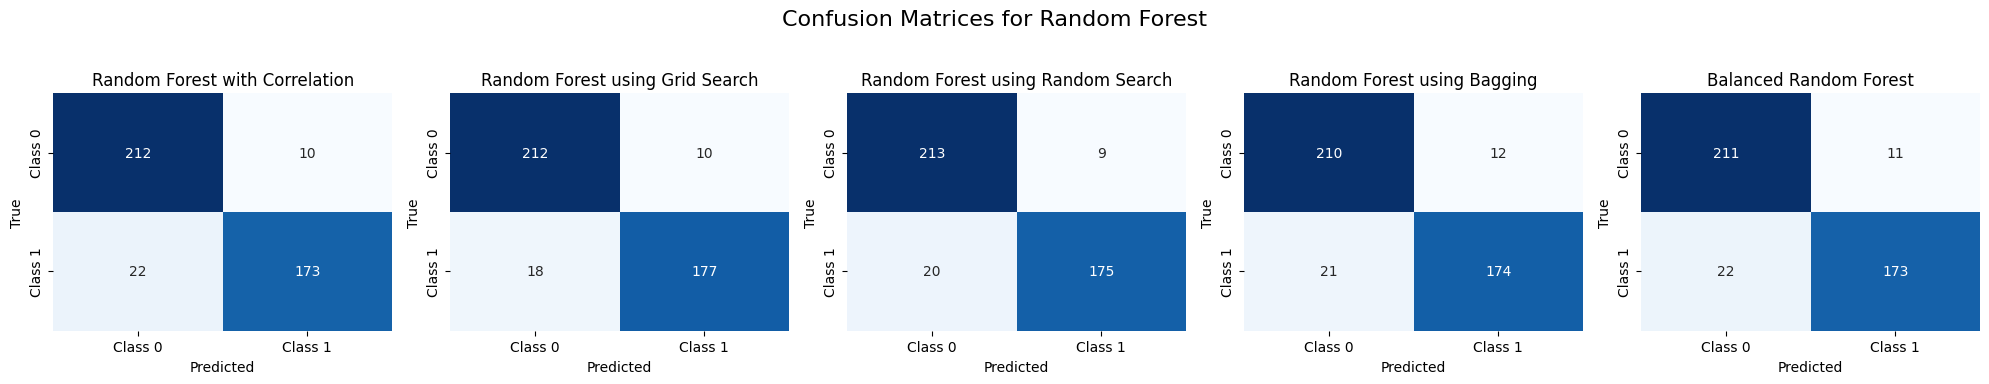

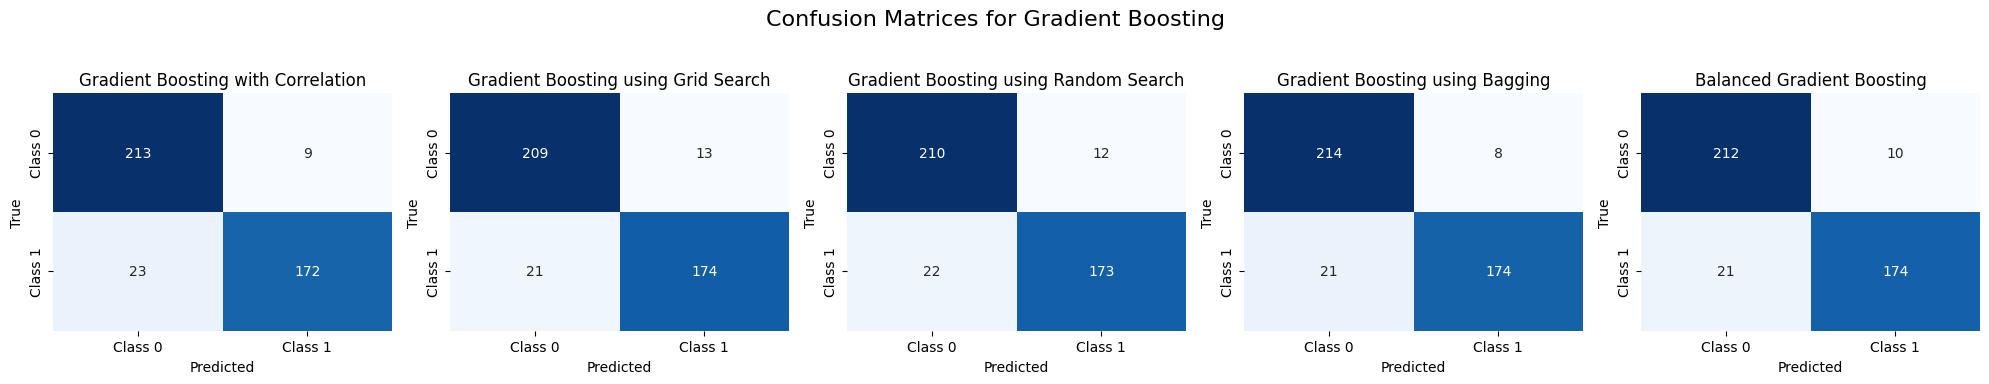

In [61]:
plot_confusion_matrices(y_true_list=y_true_list_rf_best, y_pred_list=y_pred_list_rf_best, model_names=model_names_rf_best, overall_title="Confusion Matrices for Random Forest")
plot_confusion_matrices(y_true_list=y_true_list_gb_best, y_pred_list=y_pred_list_gb_best, model_names=model_names_gb_best, overall_title="Confusion Matrices for Gradient Boosting")

### Classification Performance Summary

In [67]:
results_rf_best = pd.concat([results_rf_best, results_rf_b], ignore_index=True)
results_gb_best = pd.concat([results_gb_best, results_gb_b], ignore_index=True)
res_rf = results_rf_best.sort_values(by="Accuracy", ascending=True)
res_gb = results_gb_best.sort_values(by="Accuracy", ascending=True)


In [69]:
print(res_rf.to_markdown())
print("*"*100)
print(res_gb.to_markdown())

|    | Model                             |   Accuracy |   Precision |   Recall |   F1-Score |
|---:|:----------------------------------|-----------:|------------:|---------:|-----------:|
|  5 | Random Forest Base Model          |   0.908873 |    0.912551 | 0.905994 |   0.907894 |
|  3 | Random Forest using Bagging       |   0.920863 |    0.922287 | 0.919127 |   0.920269 |
|  4 | Balanced Random Forest            |   0.920863 |    0.922898 | 0.918815 |   0.920201 |
|  0 | Random Forest with Correlation    |   0.923261 |    0.925669 | 0.921067 |   0.922584 |
|  2 | Random Forest using Random Search |   0.930456 |    0.932625 | 0.928448 |   0.929873 |
|  1 | Random Forest using Grid Search   |   0.932854 |    0.934132 | 0.931324 |   0.932377 |
****************************************************************************************************
|    | Model                                 |   Accuracy |   Precision |   Recall |   F1-Score |
|---:|:--------------------------------------|---

In [70]:
from joblib import dump, load

# Random Forest using Grid Search
dump(model_rf_gs, 'best_random_forest_model.joblib')

# Gradient Boosting using Bagging
dump(bagging_model_gb, 'best_ghradient_boosting_model.joblib')

['best_ghradient_boosting_model.joblib']

## Фінальний висновок

У даній роботі було проведено аналіз продуктивності моделей Random Forest і Gradient Boosting з використанням різних технік покращення, включаючи додавання кореляції, Grid Search, Random Search, Bagging та балансування класів. На основі отриманих результатів можна зробити такі висновки:

### Random Forest
- **Базова модель Random Forest** показала початкову точність 90.89%, що слугує відправною точкою для подальших покращень.
- **Random Forest with Correlation** покращила показники до 92.33%, що підкреслює важливість урахування кореляції ознак.
- **Random Forest using Bagging** та **Balanced Random Forest** досягли однакової точності 92.09%, демонструючи ефективність цих підходів у зниженні дисперсії та покращенні стабільності моделі.
- **Random Forest using Random Search** та **Grid Search** показали найвищі результати, з точністю 93.05% та 93.29% відповідно. Ці методи оптимізації гіперпараметрів значно підвищили продуктивність моделі.

### Gradient Boosting
- **Базова модель Gradient Boosting** також показала початкову точність 90.89%.
- **Gradient Boosting with Correlation** покращила показники до 92.33%, аналогічно Random Forest, що підтверджує важливість кореляції.
- **Gradient Boosting using Grid Search** та **Random Search** досягли точності 91.85%, що свідчить про корисність цих методів для тонкого налаштування моделі.
- **Balanced Gradient Boosting** та **Gradient Boosting using Bagging** продемонстрували найвищу точність серед усіх моделей Gradient Boosting, досягнувши 92.57% та 93.05% відповідно, що підкреслює їх потенціал у покращенні точності та стійкості моделі.

### Висновок
На основі аналізу можна зробити висновок, що додавання кореляції та використання методів оптимізації гіперпараметрів, таких як Grid Search та Random Search, значно покращує продуктивність моделей Random Forest і Gradient Boosting. Балансування класів та Bagging також показали свою ефективність, особливо в умовах дисбалансу даних. Загалом, для завдань, що потребують високої точності та надійності, рекомендується використовувати моделі з урахуванням кореляції та оптимізовані гіперпараметри.